In [1]:
from library_dicom.dicom_processor.tools.preprocessing import *
import matplotlib.pyplot as plt
import numpy as np
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.model.SeriesCT import SeriesCT
from library_dicom.dicom_processor.tools.create_mip import *
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

result : (446, 182)


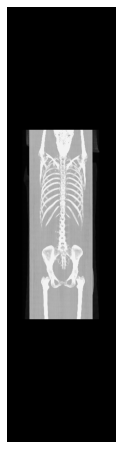

In [2]:
ct = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/51011102171008/pet0/1.2.276.0.7230010.3.2.301136_nifti_CT.nii'

ct_img = normalize_CT(ct)

result = resample_CT(ct_img, '/media/deeplearning/Elements/classif_ct', 'test')
f = plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(result, cmap='gray')

(446, 182)


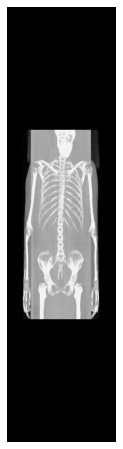

In [3]:
ct_2 = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/51011102171009/pet0/1.2.276.0.7230010.3.2.303858_nifti_CT.nii'

ct_img = normalize_CT(ct_2)

result = resample_CT(ct_img)
f = plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(result, cmap='gray')

(614, 182)


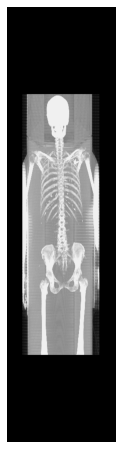

In [4]:
ct_3 = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/51011102181001/pet0/1.2.840.113619.2.55.3.279710477.870.1379571148.714_nifti_CT.nii'

ct_img = normalize_CT(ct_3)

result = resample_CT(ct_img)
f = plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(result, cmap='gray')

In [12]:
#generate for pet0 in ahl
import csv 
csv_gained_pet0= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/GAINED_PET0_NIFTI.csv'

with open(csv_gained_pet0, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [13]:
len(csv_data)

573

In [14]:
csv_data[0]

['11011101021001',
 '1.2.840.113704.1.111.3296.1350645932.9',
 'pet0',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101021001/pet0/1.2.840.113704.1.111.3296.1350645932.9_nifti_CT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101021001/pet0/1.2.840.113704.1.111.3296.1350645932.9_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101021001/pet0/1.2.840.113704.1.111.3296.1350645932.9_nifti_mask.nii']

pet0 = csv_data[0:578]

pet0[-1]

len(pet0)

for serie in pet0 : 
    ct = serie[4].replace('storage', 'deeplearning/Elements')
    serie[4] = ct 

pet0[-1]

In [16]:
error = []

directory = '/media/deeplearning/Elements/classif_ct/nifti_gained'

#path_png = []

for serie in csv_data : 
    print(csv_data.index(serie))
    try : 
        ct_img = normalize_CT(serie[3])

        result = resample_CT(ct_img, directory, serie[1])
        #filename = save_mip(result, directory, serie[2])

        #path_png.append(filename)
    except Exception as err : 
        print(err)
        error.append(serie)

0
result : (491, 219)
1
result : (529, 219)
2
result : (537, 219)
3
result : (487, 219)
4
result : (578, 219)
5
result : (491, 219)
6
result : (533, 219)
7
result : (580, 219)
8
result : (536, 219)
9
result : (519, 219)
10
result : (531, 219)
11
result : (574, 219)
12
result : (495, 219)
13
result : (576, 219)
14
result : (500, 182)
15
result : (530, 219)
16
result : (861, 182)
17
result : (565, 219)
18
result : (629, 182)
19
result : (520, 219)
20
result : (490, 219)
21
result : (579, 219)
22
result : (524, 256)
23
result : (565, 182)
24
result : (499, 219)
25
result : (440, 182)
26
result : (499, 182)
27
result : (951, 182)
28
result : (499, 182)
29
result : (559, 182)
30
result : (436, 182)
31
result : (499, 182)
32
result : (559, 182)
33
result : (559, 182)
34
result : (560, 182)
35
result : (499, 182)
36
result : (499, 182)
37
result : (499, 182)
38
result : (470, 182)
39
result : (559, 182)
40
result : (522, 182)
41
result : (559, 182)
42
result : (499, 205)
43
result : (499, 182